# Laboratory 2 : Computer Vision

# Part 1: MNIST Digist Classification

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First we'll import TensorFlow, enable Eager execution, and also import some dependencies.

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


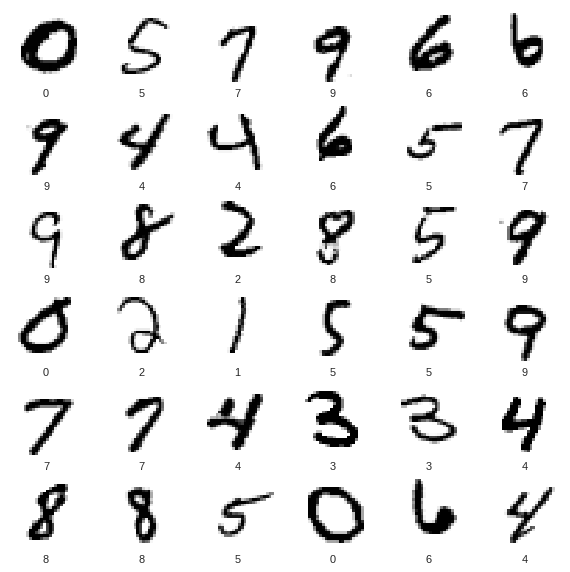

In [52]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

TODO: simple network image for the fully connected network
![alt_text](img/mnist_model.png "CNN Architecture for MNIST Classification")


### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. Note how we first use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In this next block, you'll define the output layer -- the second fully connected of this simple network.

In [0]:
model = tf.keras.Sequential([
    # First define a Flatten layer
    tf.keras.layers.Flatten(),
    '''TODO: Define the activation function for the first fully connected layer.'''
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # TODO (activation)
    '''TODO: Define the second Dense layer to output the classification probabilities'''
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # TODO (both dimension and activation)
])

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model. 

Let's take a step back and think about the network we've just created. The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are fully-connected neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model! 



### Compile the model

Before training the model, we need to define a few more settings. These are added during the model's [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) step:

* *Loss function* — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of .01. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model. 

In [0]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-2), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

We're now ready to train our model, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the number of epochs, or iterations over the MNIST dataset, to use during training. With the Keras API, this is all accomplished by calling the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) method on an instance of the Model class. 


In [30]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/2
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2405 - acc: 0.9291
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1625 - acc: 0.9559


As the model trains, the loss and accuracy metrics are displayed. With two epochs, this fully connected model should an accuracy of approximatley 0.90 (or 90%) on the training data.

### Evaluate accuracy on the test dataset

Now that we've trained the model, we can ask it to make predictions about a test set that it has n't seen before. In this example, the `test_images` array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the `test_labels` array. 

Use the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method to evaluate the model on the test dataset!

In [33]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) # TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step
('Test accuracy:', 0.9587)


You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*, when a machine learning model performs worse on new data than on its training data. 

What is the highest accuracy you can achieve with this first fully connected model? Since the handwritten digit classification task is pretty straightforward, you may be wondering how we can do better...

![Deeper...](https://i.kym-cdn.com/photos/images/newsfeed/000/534/153/f87.jpg)

## 1.3 Convolutional Neural Network (CNN) for Handwritten Digit Classification

In [0]:
model = tf.keras.Sequential([
 #   tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), strides=(2,2), input_shape=(28, 28, 1), activation=tf.nn.relu),
#     tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), strides=(2,2), activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [35]:
predictions[0]

array([5.1061343e-17, 3.5403284e-11, 4.8335502e-10, 3.4263209e-08,
       4.3520136e-22, 1.3672515e-09, 6.6744450e-28, 1.0000000e+00,
       3.8897252e-13, 1.4670496e-11], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different digits. We can see which label has the highest confidence value:

In [36]:
np.argmax(predictions[0])

7

So the model is most confident that this image is a "7". And we can check the test label to see this is correct:

In [37]:
test_labels[0]

7

We can graph this to look at the full set of 10 channels

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

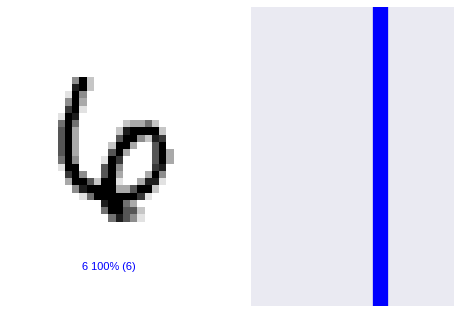

In [48]:
#@title Try changing the sldier to find when the model fails! { run: "auto" }

image_index = 22 #@param {type:"slider", min:0, max:50, step:1}
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

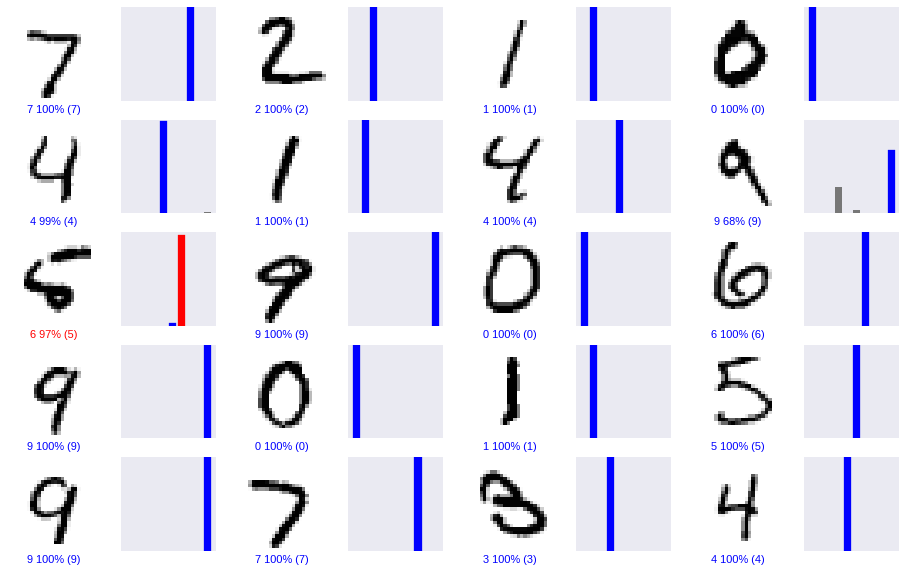

In [49]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


And, as before, the model predicts a label of 9.